# Data Showcase Project - Monster Data

## Importing Librarys and Data 

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-10-29/monster_movies.csv'
data = pd.read_csv(url)
data.head()

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
0,tt0016123,movie,The Monster,The Monster,1925,86.0,"Comedy,Horror,Mystery",the monster,6.2,1412
1,tt0023236,movie,The Monster Walks,The Monster Walks,1932,57.0,"Horror,Mystery",the monster walks,4.1,1120
2,tt0031208,movie,The Human Monster,The Dark Eyes of London,1939,73.0,"Crime,Drama,Horror",the human monster,5.7,1579
3,tt0033879,movie,Man Made Monster,Man Made Monster,1941,59.0,"Drama,Horror,Romance",man made monster,6.1,1953
4,tt0033916,movie,The Monster and the Girl,The Monster and the Girl,1941,65.0,"Crime,Drama,Horror",the monster and the girl,6.0,799


## Graphs and Analysis

### Question 1 - Do people enjoy longer movies?

One of the interesting questions that could be explored from this data is if audiences prefer longer monster movies. To start, let's take a look at the descriptive statistics, and a simple plot for these two variables.   

In [3]:
## Desciptive Statistics:
avgRating = data['average_rating']
runtime_minutes = data['runtime_minutes']
print("Average Rating:")
print(avgRating.describe())
print("\nRuntime:")
print(runtime_minutes.describe())

Average Rating:
count    630.000000
mean       5.773968
std        1.586165
min        1.200000
25%        4.800000
50%        6.000000
75%        6.900000
max        9.500000
Name: average_rating, dtype: float64

Runtime:
count    576.000000
mean      80.185764
std       27.514332
min        1.000000
25%       70.000000
50%       84.000000
75%       93.000000
max      295.000000
Name: runtime_minutes, dtype: float64


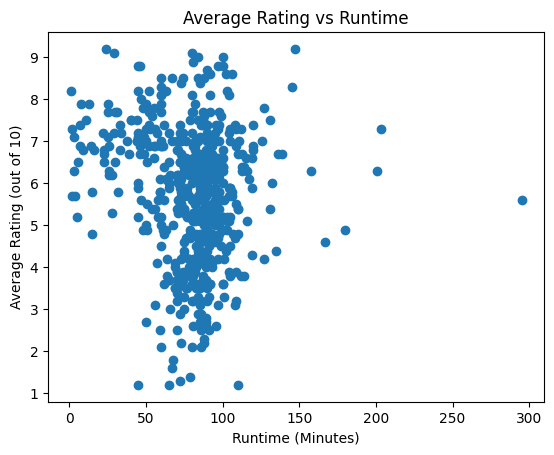

In [4]:
plt.scatter(runtime_minutes,avgRating)
plt.title("Average Rating vs Runtime")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Average Rating (out of 10)")
plt.show()

**Visual Analysis** 

The data is heavily clustered, with 50% of the data between 70 and 93 minute runtimes. While almost all of the films rated below 5/10 are within that range, there are also many films rated above 8/10 within that range too. There are a lot of outliers though, so it would be interesting to see what this chart looks like without outliers.

**Removing Outliers**

In [5]:
dataQ1 = data
dataQ1['z_Score'] = abs((dataQ1['runtime_minutes'] - dataQ1['runtime_minutes'].mean()) / dataQ1['runtime_minutes'].std())
dataQ1.head

<bound method NDFrame.head of         tconst title_type                primary_title  \
0    tt0016123      movie                  The Monster   
1    tt0023236      movie            The Monster Walks   
2    tt0031208      movie            The Human Monster   
3    tt0033879      movie             Man Made Monster   
4    tt0033916      movie     The Monster and the Girl   
..         ...        ...                          ...   
625  tt9563330      movie              Goodbye Monster   
626  tt9572006      movie             My Sweet Monster   
627  tt9598824      movie         I Am (Not) a Monster   
628  tt9620986      movie                      Monster   
629  tt9702912      movie  Monster with a Movie Camera   

                           original_title  year  runtime_minutes  \
0                             The Monster  1925             86.0   
1                       The Monster Walks  1932             57.0   
2                 The Dark Eyes of London  1939             73.0   
3

In [6]:
dataQ1Clean = dataQ1[dataQ1['z_Score']<=2]
dataQ1Clean.head

<bound method NDFrame.head of         tconst title_type                primary_title  \
0    tt0016123      movie                  The Monster   
1    tt0023236      movie            The Monster Walks   
2    tt0031208      movie            The Human Monster   
3    tt0033879      movie             Man Made Monster   
4    tt0033916      movie     The Monster and the Girl   
..         ...        ...                          ...   
625  tt9563330      movie              Goodbye Monster   
626  tt9572006      movie             My Sweet Monster   
627  tt9598824      movie         I Am (Not) a Monster   
628  tt9620986      movie                      Monster   
629  tt9702912      movie  Monster with a Movie Camera   

                           original_title  year  runtime_minutes  \
0                             The Monster  1925             86.0   
1                       The Monster Walks  1932             57.0   
2                 The Dark Eyes of London  1939             73.0   
3

**Graph with Zscore < 3**

In [7]:
avgRating = dataQ1Clean['average_rating']
runtime_minutes = dataQ1Clean['runtime_minutes']
print("Average Rating:")
print(avgRating.describe())
print("\nRuntime:")
print(runtime_minutes.describe())

Average Rating:
count    540.000000
mean       5.640926
std        1.571326
min        1.200000
25%        4.675000
50%        5.800000
75%        6.700000
max        9.100000
Name: average_rating, dtype: float64

Runtime:
count    540.000000
mean      81.638889
std       19.233290
min       26.000000
25%       72.000000
50%       84.000000
75%       93.000000
max      135.000000
Name: runtime_minutes, dtype: float64


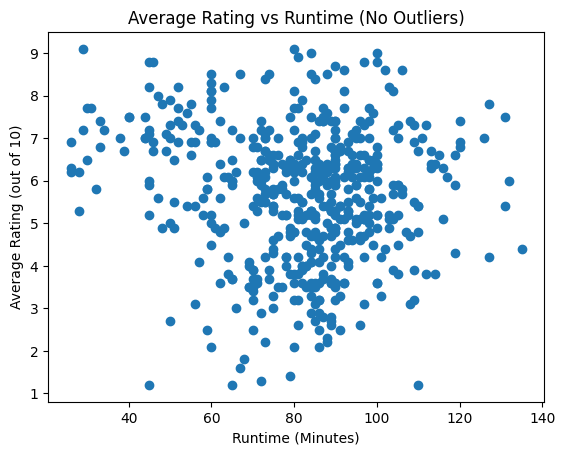

In [8]:
plt.scatter(runtime_minutes,avgRating)
plt.title("Average Rating vs Runtime (No Outliers)")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Average Rating (out of 10)")
plt.show()

In [9]:
print(avgRating.corr(runtime_minutes))

-0.11099887776431547


**Analysis**

With a correlation of -.11, this is incredibly weak. As a result of this, the data does not support any correlation between film length and average rating. Further points for analysis could include exploring genres of monster films or investigating various thresholds of number of votes to see if more niche films skew the data at all.

Data sourced from IMDB by statssignificant (https://www.statsignificant.com/p/why-do-people-like-horror-films-), selected as part of TidyTuesday (https://github.com/rfordatascience/tidytuesday/tree/master)
Analysis done by David Ross, 2024